In [131]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os
import pandas as pd

1.load images and csv 

2.convert images into array(imagedata)

3.create a dictionary with key as pokemon_name in csv file and value as class_no

4.make image_data array and labels array

5.feed it to the model and train it

6.repeat the steps 1-4 for the test data 

7.predict labels and calculate the accuracu on training data

8.covert the result into submission format

In [132]:
classes = pd.read_csv("/Users/paruldiwakar/Desktop/codes/test_train/SVM_Pokedex/Train/train.csv").values

In [133]:
label_dict = {'Pikachu':0 , 'Bulbasaur':1 , 'Charmander':2}

labels = []
image_data = []

for label in classes[:,1]:
    labels.append(label_dict[label])

for img_id in classes[:,0]:
    
    img_path = "/Users/paruldiwakar/Desktop/codes/test_train/SVM_Pokedex/Train/Images/"+img_id
    img = image.load_img(img_path,target_size=(100,100))
    img_array = image.img_to_array(img)
        
    image_data.append(img_array)
    
    

/Users/paruldiwakar/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [134]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)
print(image_data.shape,labels.shape)

(304, 100, 100, 3) (304,)


In [135]:
label_to_pokemon = { 0:'Pikachu', 1:'Bulbasaur', 2:'Charmander' }

import random

combined = list(zip(image_data,labels))

#random.shuffle(combined)

In [136]:
#combined

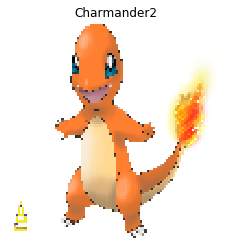

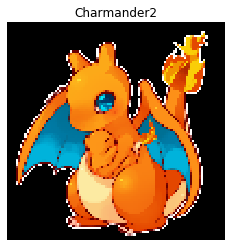

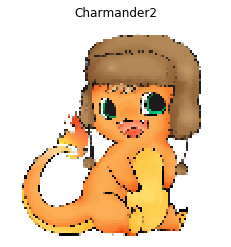

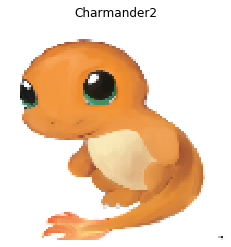

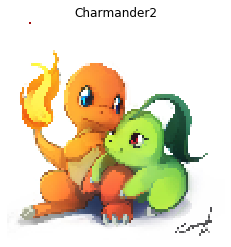

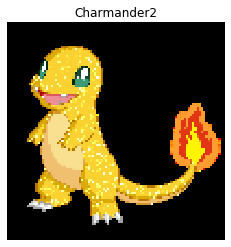

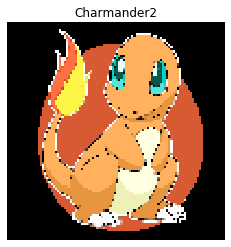

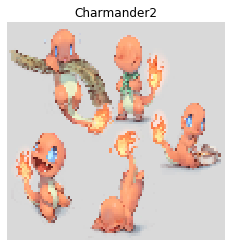

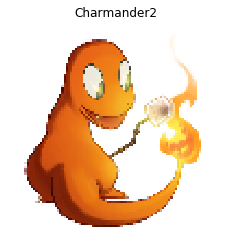

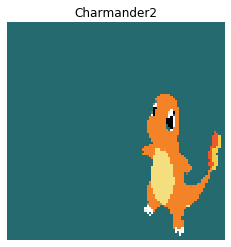

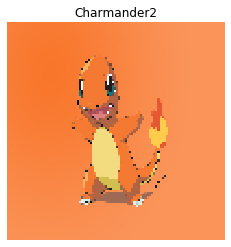

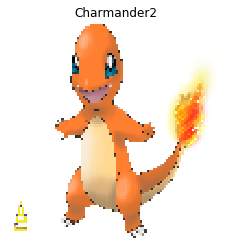

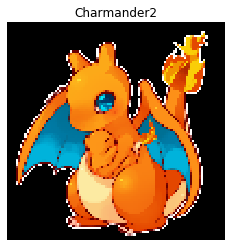

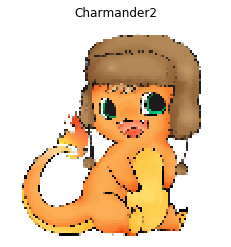

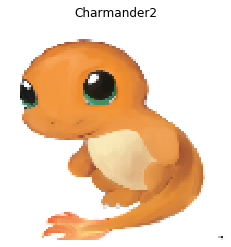

IndexError: index 304 is out of bounds for axis 0 with size 304

In [137]:


#Unzip
image_data[:],labels = zip(*combined)

def draw(img,label):
    title = label_to_pokemon[label]
    plt.title(title+str(label))
    plt.axis("off")
    plt.imshow(img)
    plt.show()

for i in range(289,305):
    
    draw(image_data[i],labels[i])   

In [138]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [139]:
M = image_data.shape[0]
image_data = image_data.reshape((M,-1)) #All the images are flattened into single row
labels = np.array(labels)

In [140]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

1.0

# Testing

In [141]:
test = pd.read_csv("/Users/paruldiwakar/Desktop/codes/test_train/SVM_Pokedex/Test/test.csv").values

In [143]:

#labels = []
test_image_data = []

#for label in classes[:,1]:
 #   labels.append(label_dict[label])

for img_id in test[:,0]:
    
    img_path = "/Users/paruldiwakar/Desktop/codes/test_train/SVM_Pokedex/Test/Images/"+img_id
    img = image.load_img(img_path,target_size=(100,100))
    img_array = image.img_to_array(img)
        
    test_image_data.append(img_array)
    
    

In [145]:
test_image_data = np.array(test_image_data,dtype='float32')/255.0

In [146]:
print(test_image_data.shape)

(123, 100, 100, 3)


In [147]:
m = test_image_data.shape[0]
test_image_data = test_image_data.reshape((m,-1)) #All the images are flattened into single row


In [166]:
pred = svm_classifier.predict(test_image_data)
pred = list(pred)
#pred

In [167]:
NameOfPokemon = []
for i in pred:
    NameOfPokemon.append(label_to_pokemon[i])
    

In [168]:
label_to_pokemon[pred[1]]

'Charmander'

In [186]:
#np.unique(pred)
NameOfPokemon = np.array(NameOfPokemon)
test = np.array(test)
test = test[:,0]

In [187]:
combined = list(zip(test,NameOfPokemon))
combined

[('1106.jpg', 'Bulbasaur'),
 ('2236.jpg', 'Charmander'),
 ('1131.jpg', 'Bulbasaur'),
 ('2221.jpg', 'Charmander'),
 ('2011.jpg', 'Pikachu'),
 ('2030.jpg', 'Charmander'),
 ('2035.jpg', 'Pikachu'),
 ('1110.jpg', 'Bulbasaur'),
 ('1104.jpg', 'Bulbasaur'),
 ('2217.jpg', 'Charmander'),
 ('1111.jpg', 'Bulbasaur'),
 ('1100.jpg', 'Bulbasaur'),
 ('1112.jpg', 'Bulbasaur'),
 ('1138.jpg', 'Bulbasaur'),
 ('2238.jpg', 'Charmander'),
 ('2009.jpg', 'Bulbasaur'),
 ('2225.jpg', 'Charmander'),
 ('2240.jpg', 'Charmander'),
 ('2020.jpg', 'Pikachu'),
 ('2209.jpg', 'Charmander'),
 ('2029.jpg', 'Pikachu'),
 ('1114.jpg', 'Bulbasaur'),
 ('2201.jpg', 'Charmander'),
 ('1118.jpg', 'Bulbasaur'),
 ('2025.jpg', 'Charmander'),
 ('2202.jpg', 'Charmander'),
 ('1117.jpg', 'Bulbasaur'),
 ('1119.jpg', 'Bulbasaur'),
 ('2000.jpg', 'Pikachu'),
 ('2007.jpg', 'Pikachu'),
 ('2039.jpg', 'Pikachu'),
 ('2017.jpg', 'Pikachu'),
 ('2215.jpg', 'Charmander'),
 ('1120.jpg', 'Bulbasaur'),
 ('2006.jpg', 'Pikachu'),
 ('1116.jpg', 'Bulbasaur')

In [190]:
Pokedex = pd.DataFrame(combined,columns=['ImageId','NameOfPokemon'])

In [191]:
result

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu
...,...,...
118,1124.jpg,Bulbasaur
119,2014.jpg,Pikachu
120,2235.jpg,Charmander
121,1126.jpg,Bulbasaur


In [192]:
Pokedex.to_csv("Pokedex.csv",index=False)